In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

In [7]:
# !pip install pandas

In [19]:
section_folders = glob.glob('/home2/jh981017/myubai/machinelearning/Downloads/*')
section_folders

['/home2/jh981017/myubai/machinelearning/Downloads/Article Baseline_new.csv',
 '/home2/jh981017/myubai/machinelearning/Downloads/Article Baseline.csv',
 '/home2/jh981017/myubai/machinelearning/Downloads/Article Fusion_new.csv',
 '/home2/jh981017/myubai/machinelearning/Downloads/Article Fusion.csv',
 '/home2/jh981017/myubai/machinelearning/Downloads/Annotation Fusion_new.csv',
 '/home2/jh981017/myubai/machinelearning/Downloads/Annotation Fusion.csv']

In [20]:
root = '/home2/jh981017/myubai/machinelearning/Downloads'
sections = os.listdir(root)
sections

['Article Baseline_new.csv',
 'Article Baseline.csv',
 'Article Fusion_new.csv',
 'Article Fusion.csv',
 'Annotation Fusion_new.csv',
 'Annotation Fusion.csv']

In [21]:
text_paths = []
for section in sections:
    text_path = os.path.join(root, section)
    text_paths.append(text_path)
text_paths = [path for path in text_paths if '.ipynb_checkpoints' not in path]

In [22]:
print(text_paths)

['/home2/jh981017/myubai/machinelearning/Downloads/Article Baseline_new.csv', '/home2/jh981017/myubai/machinelearning/Downloads/Article Baseline.csv', '/home2/jh981017/myubai/machinelearning/Downloads/Article Fusion_new.csv', '/home2/jh981017/myubai/machinelearning/Downloads/Article Fusion.csv', '/home2/jh981017/myubai/machinelearning/Downloads/Annotation Fusion_new.csv', '/home2/jh981017/myubai/machinelearning/Downloads/Annotation Fusion.csv']


In [23]:
result_df = pd.DataFrame()

for text_path in text_paths:
    df = pd.read_csv(text_path)

    # 파일 이름에 '_new'가 없다면 마지막 열의 평균을 구함
    if '_new' not in text_path:
        value = df.iloc[:, -1].mean()
    # 파일 이름에 '_new'가 있다면 마지막 열의 마지막 값을 구함
    else:
        value = df.iloc[:, -1].iloc[-1]

    # 파일 이름을 인덱스로 사용하여 결과 데이터프레임에 추가
    file_name = os.path.basename(text_path)
    result_df.loc[file_name, 'value'] = value

print(result_df)

                              value
Article Baseline_new.csv   0.735743
Article Baseline.csv       0.739583
Article Fusion_new.csv     0.728585
Article Fusion.csv         0.724306
Annotation Fusion_new.csv  0.610975
Annotation Fusion.csv      0.651806


In [31]:
result_df = pd.DataFrame({
    'value': [0.735743, 0.739583, 0.728585, 0.724306, 0.610975, 0.651806,0.747552448,0.739545455],
    'filename': ['Article Baseline_test.csv', 'Article Baseline.csv', 'Article Fusion_test.csv', 'Article Fusion.csv', 'Annotation Fusion_test.csv', 'Annotation Fusion.csv','Competitor_test.csv','RoBaMF_test.csv']
})

# 파일 이름에서 확장자 제거하기
result_df['filename'] = result_df['filename'].str.replace('.csv', '')

print(result_df)


      value                filename
0  0.735743   Article Baseline_test
1  0.739583        Article Baseline
2  0.728585     Article Fusion_test
3  0.724306          Article Fusion
4  0.610975  Annotation Fusion_test
5  0.651806       Annotation Fusion
6  0.747552         Competitor_test
7  0.739545             RoBaMF_test


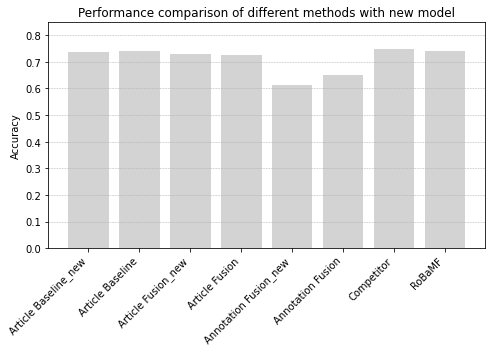

In [30]:
# 데이터 프레임의 'value' 열의 값을 막대의 높이로 사용합니다.
heights = result_df['value']

# 데이터 프레임의 인덱스(파일 이름)을 x축의 레이블로 사용합니다.
labels = result_df.filename

# 막대 그래프 그리기
plt.figure(figsize=(7, 5)) # 그래프 크기 설정
plt.bar(labels, heights, color='') # 막대의 색상을 하늘색으로 설정

# y축 제목 설정
plt.ylabel('Accuracy')

# 막대 그래프 제목 설정
plt.title('Performance comparison of different methods with new model')

# x축 레이블에 대한 회전(rotation)을 설정하여 모든 레이블이 가독성 있게 표시되도록 합니다.
plt.xticks(rotation=45, ha="right") # 막대 레이블을 45도 기울여 표시

# y축의 스케일과 그리드 설정 (예시 이미지와 유사하게 만들기 위해)
plt.ylim([0, max(heights)+0.1]) # y축 스케일을 설정하여 모든 값이 포함되도록 합니다.
plt.grid(axis='y', linestyle='--', linewidth=0.5) # y축에 그리드 추가

# 그래프를 표시합니다.
plt.tight_layout() # 레이아웃 조정
plt.show()

In [33]:
result_df = pd.DataFrame({
    'value': [0.388056, 0.366608, 0.735743, 0.739583, 0.728585, 0.724306, 0.610975, 0.651806,0.747552448,0.739545455],
    'filename': ['Image Baseline', 'Image Baseline_test', 'Article Baseline_test', 'Article Baseline', 'Article Fusion_test', 'Article Fusion', 'Annotation Fusion_test', 'Annotation Fusion','Competitor_test','RoBaMF_test']
})

# 파일 이름에서 "_new"가 있는 데이터프레임과 없는 데이터프레임으로 나누기
result_df_new = result_df[result_df['filename'].str.contains('_test')]
result_df_old = result_df[~result_df['filename'].str.contains('_test')]

print("result_df_new:")
print(result_df_new)
print("result_df_old:")
print(result_df_old)


result_df_new:
      value                filename
1  0.366608     Image Baseline_test
2  0.735743   Article Baseline_test
4  0.728585     Article Fusion_test
6  0.610975  Annotation Fusion_test
8  0.747552         Competitor_test
9  0.739545             RoBaMF_test
result_df_old:
      value           filename
0  0.388056     Image Baseline
3  0.739583   Article Baseline
5  0.724306     Article Fusion
7  0.651806  Annotation Fusion


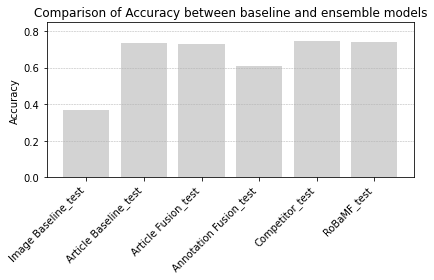

In [35]:
# 데이터 프레임의 'value' 열의 값을 막대의 높이로 사용합니다.
heights = result_df_new['value']

# 데이터 프레임의 인덱스(파일 이름)을 x축의 레이블로 사용합니다.
labels = result_df_new.filename

# 막대 그래프 그리기
plt.figure(figsize=(6, 4)) # 그래프 크기 설정
plt.bar(labels, heights, color='lightgrey') # 막대의 색상을 하늘색으로 설정

# y축 제목 설정
plt.ylabel('Accuracy')

# 막대 그래프 제목 설정
plt.title('Comparison of Accuracy between baseline and ensemble models')

# x축 레이블에 대한 회전(rotation)을 설정하여 모든 레이블이 가독성 있게 표시되도록 합니다.
plt.xticks(rotation=45, ha="right") # 막대 레이블을 45도 기울여 표시

# y축의 스케일과 그리드 설정 (예시 이미지와 유사하게 만들기 위해)
plt.ylim([0, max(heights)+0.1]) # y축 스케일을 설정하여 모든 값이 포함되도록 합니다.
plt.grid(axis='y', linestyle='--', linewidth=0.5) # y축에 그리드 추가

# 그래프를 표시합니다.
plt.tight_layout() # 레이아웃 조정
plt.show()

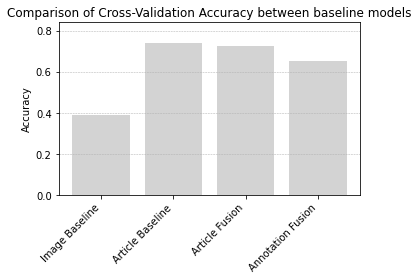

FileNotFoundError: [Errno 2] No such file or directory: '/home2/jh981017/myubai/machinelearnin/gmy_figure.png'

<Figure size 432x288 with 0 Axes>

In [17]:
# 데이터 프레임의 'value' 열의 값을 막대의 높이로 사용합니다.
heights = result_df_old['value']

# 데이터 프레임의 인덱스(파일 이름)을 x축의 레이블로 사용합니다.
labels = result_df_old.filename

# 막대 그래프 그리기
plt.figure(figsize=(5, 4)) # 그래프 크기 설정
plt.bar(labels, heights, color='lightgrey') # 막대의 색상을 하늘색으로 설정

# y축 제목 설정
plt.ylabel('Accuracy')

# 막대 그래프 제목 설정
plt.title('Comparison of Cross-Validation Accuracy between baseline models')

# x축 레이블에 대한 회전(rotation)을 설정하여 모든 레이블이 가독성 있게 표시되도록 합니다.
plt.xticks(rotation=45, ha="right") # 막대 레이블을 45도 기울여 표시

# y축의 스케일과 그리드 설정 (예시 이미지와 유사하게 만들기 위해)
plt.ylim([0, max(heights)+0.1]) # y축 스케일을 설정하여 모든 값이 포함되도록 합니다.
plt.grid(axis='y', linestyle='--', linewidth=0.5) # y축에 그리드 추가

# 그래프를 표시합니다.
plt.tight_layout() # 레이아웃 조정
plt.show()

plt.savefig('/home2/jh981017/myubai/machinelearnin/gmy_figure.png')